In [2]:
import pandas as pd

In [24]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
pd.read_csv(url)

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Quitinete;Copacabana;1;0;0;40;1700;500;60
1,Casa;Jardim Botânico;2;0;1;100;7000;;
2,Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...
3,Apartamento;Centro;1;0;0;15;800;390;20
4,Apartamento;Higienópolis;1;0;0;48;800;230;
...,...
32955,Quitinete;Centro;0;0;0;27;800;350;25
32956,Apartamento;Jacarepaguá;3;1;2;78;1800;800;40
32957,Apartamento;São Francisco Xavier;2;1;0;48;1400...
32958,Apartamento;Leblon;2;0;0;70;3000;760;


In [88]:
df = pd.read_csv(url, sep=';')

In [28]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [32]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

## EDA

In [8]:
df.set_index("Country", inplace=True)

In [10]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
anos = list(map(str, range(1980, 2014)))

In [12]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [19]:
brasil_rows = df.loc[df['Country'] == 'Brasil']

KeyError: 'Country'

In [22]:
df.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

### Valor medio de aluguel por tipo de imovel 

In [37]:
df.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [38]:
df.groupby('Tipo')['Valor'].mean(numeric_only=True)

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [40]:
media_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

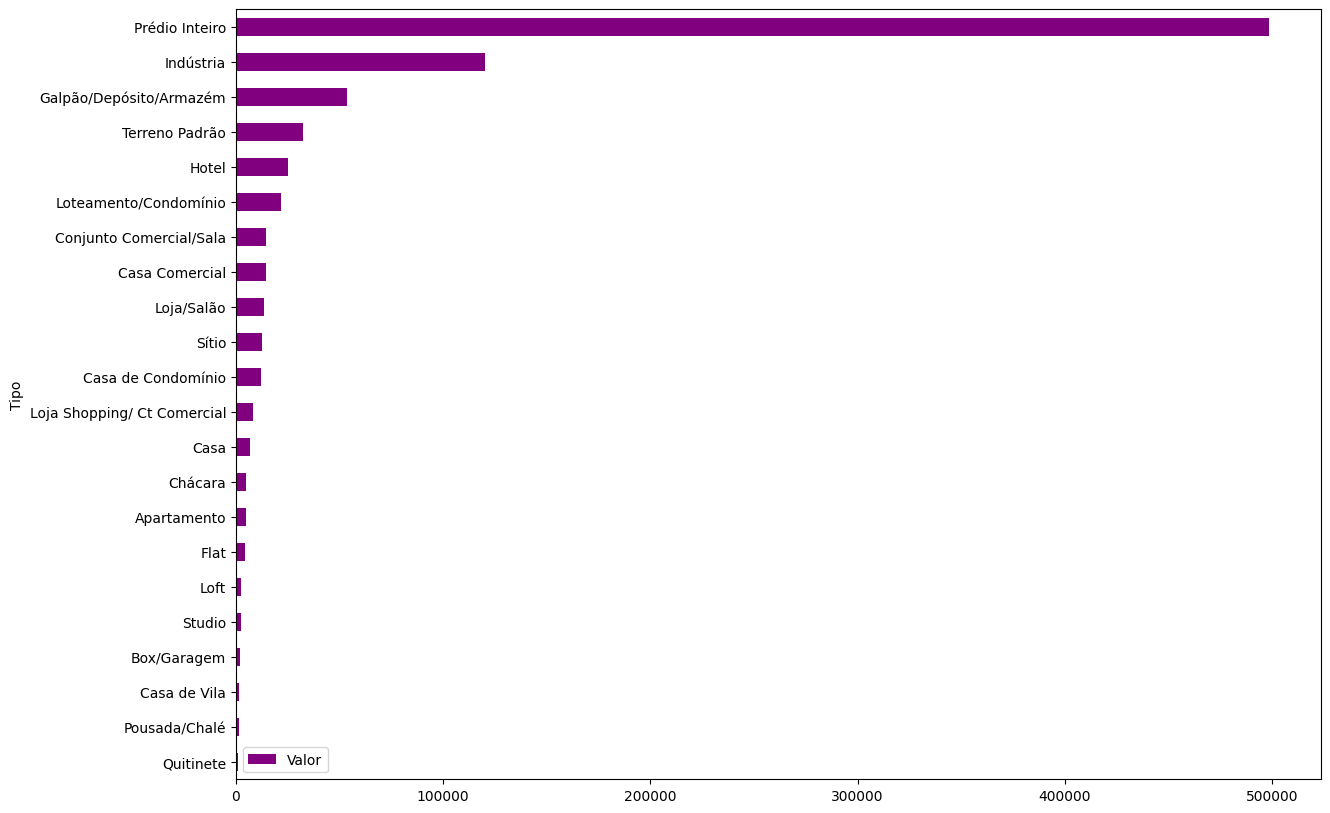

In [42]:
media_preco_tipo.plot(kind='barh', figsize=(14, 10), color ='purple');

### Remocao de imoveis de tipos comerciais

In [46]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [47]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [53]:
# quando usanos uma expressao no query e precisamos passar uma variavel utilizamos o @
imoveis_residenciais = df.query('@imoveis_comerciais not in Tipo')

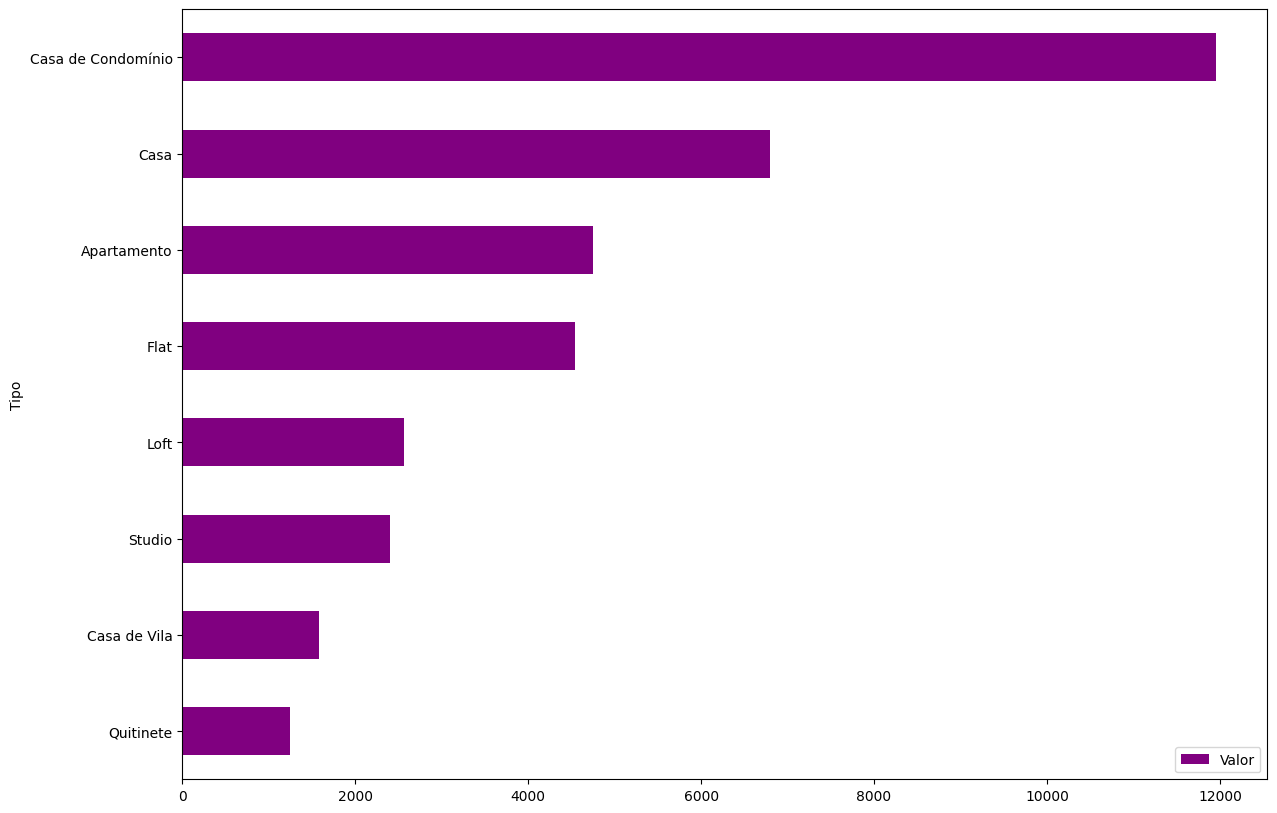

In [54]:
media_preco_tipo_imoveis_residenciais = imoveis_residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
media_preco_tipo_imoveis_residenciais.plot(kind='barh', figsize=(14, 10), color ='purple');

### Percentual de cada tipo de imovel 

In [60]:
imoveis_residenciais.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [61]:
imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


In [62]:
df_percentual_tipo = imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

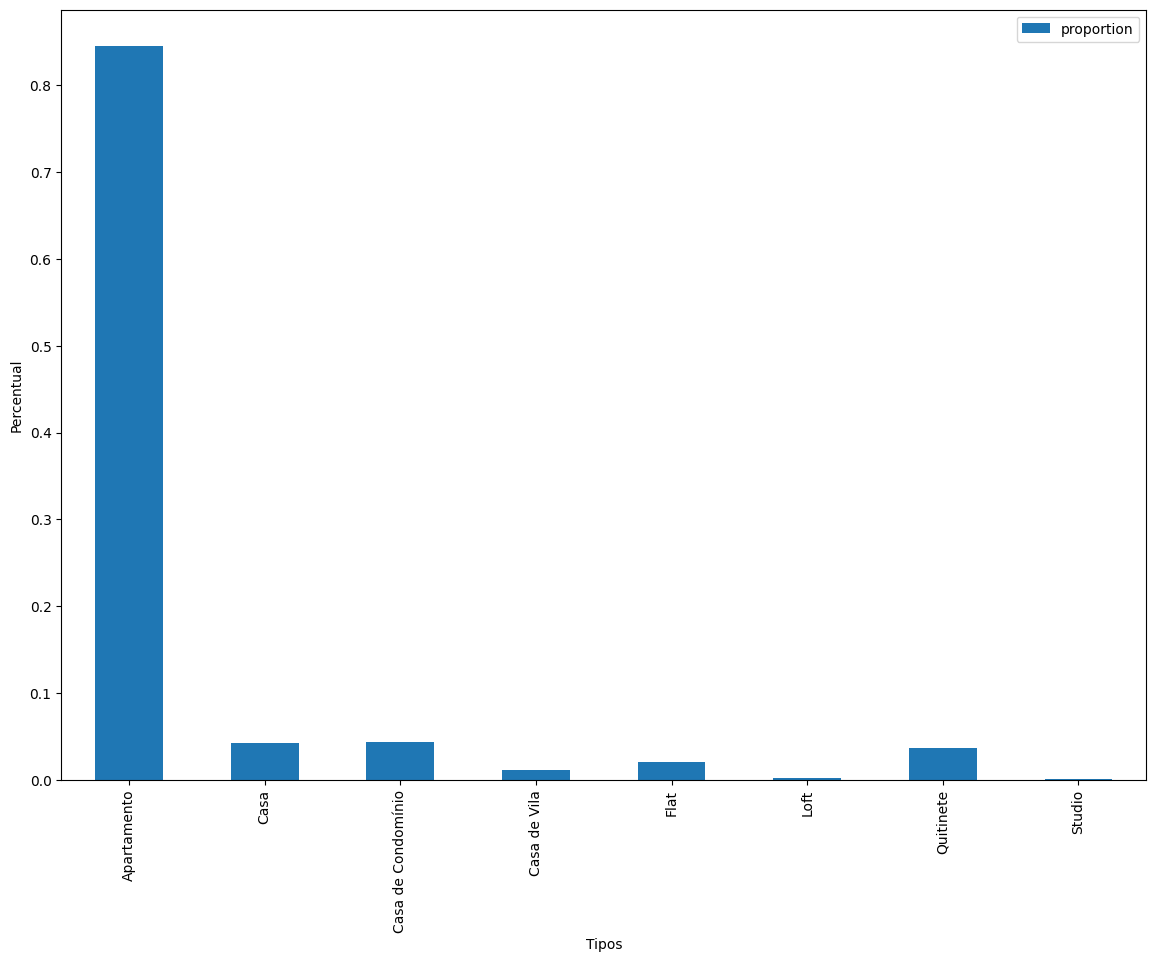

In [66]:
df_percentual_tipo.plot(kind='bar' , figsize=(14, 10), xlabel = 'Tipos', ylabel = 'Percentual');

### Selecionando apenas imoveis do tipo apartamento

In [68]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [72]:
df.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [73]:
df.isna().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [75]:
df = df.fillna(0)

### Removendo registros inconsistentes

In [90]:
remover = df.query('Valor == 0 | Condominio == 0')

In [89]:
df.drop(remover, axis=0, inplace=True)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


# Filtros

### Filtrando apartamentos

In [93]:
selecao1 = df['Quartos'] == 1
df[selecao1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
32922,Apartamento,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Apartamento,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


In [95]:
selecao2 = df['Valor'] < 1200
df[selecao2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN
...,...,...,...,...,...,...,...,...,...
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0


In [97]:
selecao_filnal = (selecao1) & (selecao2)
df[selecao_filnal]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,NaN
32859,Casa,Campo Grande,1,0,0,50,600.0,NaN,NaN


## CRiando colunas numericas

In [99]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [100]:
dados['valor_por_mes'] = dados['Condominio'] + dados['Valor']

In [101]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


## Criando colnas categoricas

In [104]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro']

In [105]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,Quitinete em Copacabana
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,Casa em Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,Conjunto Comercial/Sala em Barra da Tijuca
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,Apartamento em Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,Apartamento em Higienópolis


In [108]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                                        dados['Quartos'].astype(str) + ' quarto(s) ' + \
                                        ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'

In [109]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,Apartamento em Higienópolis com 1 quarto(s) e...


In [111]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: "Sim" if x > 0 else "Nao")

In [112]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Nao
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Nao
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Nao
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,Apartamento em Higienópolis com 1 quarto(s) e...,Nao
